In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
matplotlib.style.use('ggplot')

In [3]:
data = {
    'x': [13, 19, 16, 14, 15, 14],
    'y': [40, 83, 62, 48, 58, 43]
}

In [4]:
data = pd.DataFrame(data)

In [5]:
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


In [6]:
data.rename(columns = {'x':'price', 'y':'sales'}, inplace = True); data

,price,sales
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


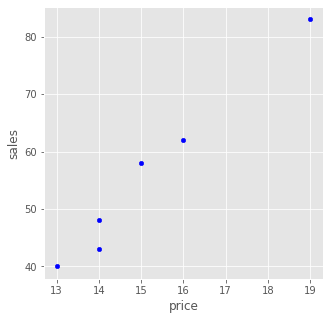

In [7]:
data.plot(kind = 'scatter', x = 'price', y = 'sales', figsize=(5,5),color = 'blue')

In [8]:
# 최소자승법 구하기
data

,price,sales
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


In [9]:
data.columns = ['x', 'y']

In [10]:
data

,x,y
0,13,40
1,19,83
2,16,62
3,14,48
4,15,58
5,14,43


In [11]:
b = ((data['x']*data['y']).sum() - data['x'].mean() * data['y'].mean() * len(data)) / ((data['x'] * data['x']).sum() - len(data) * data['x'].mean() * data['x'].mean()); b

7.32846715328465

In [12]:
a = data['y'].mean() - b * data['x'].mean(); a

-55.48175182481719

In [13]:
# 가격이 20인 자동차 판매액 예측
20 * b + a

91.08759124087581

In [14]:
from sklearn import linear_model

In [15]:
linear_regression = linear_model.LinearRegression()

In [16]:
type(data['x'])

pandas.core.series.Series

In [17]:
type(data[['x']])

pandas.core.frame.DataFrame

In [18]:
linear_regression.fit(X = data[['x']], y = data['y'])
print('a value =', linear_regression.intercept_)
print('b value =', linear_regression.coef_)

a value = -55.48175182481753
b value = [7.32846715]


In [19]:
linear_regression.predict([[20]])

array([91.08759124])

In [20]:
linear_regression.predict([[20], [30]])

array([ 91.08759124, 164.37226277])

In [21]:
prediction = linear_regression.predict(data[['x']]); prediction

array([39.78832117, 83.75912409, 61.77372263, 47.11678832, 54.44525547,
       47.11678832])

In [22]:
residual = data['y'] - linear_regression.predict(data[['x']]); residual # Residual

0    0.211679
1   -0.759124
2    0.226277
3    0.883212
4    3.554745
5   -4.116788
Name: y, dtype: float64

In [23]:
residual.describe()

count    6.000000e+00
mean     5.921189e-15
std      2.491445e+00
min     -4.116788e+00
25%     -5.164234e-01
50%      2.189781e-01
75%      7.189781e-01
max      3.554745e+00
Name: y, dtype: float64

In [24]:
SSE = (residual**2).sum(); SSE

31.03649635036502

In [25]:
SST = ((data['y']-data['y'].mean())**2).sum(); SST

1257.3333333333333

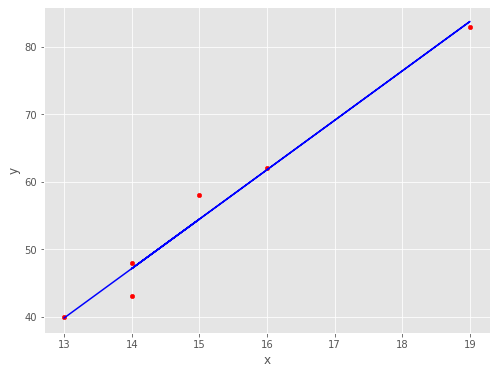

In [26]:
data.plot(kind = 'scatter', x = 'x', y = 'y', figsize = (8, 6), color = 'red')
plt.plot(data['x'], prediction, color = 'blue')

# 보스턴 집값

In [27]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [28]:
from sklearn import datasets

In [29]:
boston_house_prices = datasets.load_boston(); boston_house_prices

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [30]:
boston_house_prices.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [31]:
boston_house_prices.data[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [32]:
boston_house_prices.data.shape

(506, 13)

In [33]:
boston_house_prices.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [34]:
print(boston_house_prices.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [35]:
df = pd.DataFrame(boston_house_prices.data); df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [36]:
boston_house_prices.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [37]:
df.columns = boston_house_prices.feature_names

In [38]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [39]:
len(boston_house_prices.target)

506

In [40]:
df['price'] = boston_house_prices.target

In [41]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


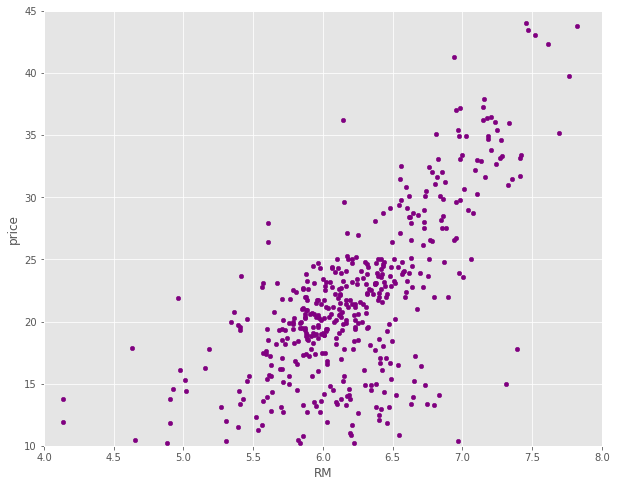

In [42]:
df.plot(kind = 'scatter', x = 'RM', y = 'price', figsize = (10, 8), color = 'purple', xlim =(4,8), ylim = (10, 45))

In [43]:
data = df[['RM', 'price']]; data

,RM,price
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


In [44]:
  data.columns = ['x', 'y']; data

,x,y
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


In [45]:
(data['x']**2).sum()

20234.598247

In [46]:
b = ((data['x'] * data['y']).sum() - len(data) * data['x'].mean() * data['y'].mean()) / ((data['x']**2).sum() - len(data) * (data['x'].mean()**2)); b

9.102108981181456

In [47]:
a = data['y'].mean() - b * data['x'].mean(); a

-34.670620776445816

In [48]:
linear_regression = linear_model.LinearRegression()

In [49]:
data

,x,y
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
...,...,...
501,6.593,22.4
502,6.120,20.6
503,6.976,23.9
504,6.794,22.0


In [50]:
linear_regression.fit(X = data[['x']], y = data['y'])
prediction = linear_regression.predict(X = data[['x']])

In [51]:
print('a value =', linear_regression.intercept_)
print('b value =', linear_regression.coef_)

a value = -34.67062077643857
b value = [9.10210898]


In [52]:
room = [4, 15]

In [53]:
np.array(room)

array([ 4, 15])

In [54]:
linear_regression.predict([[4], [15]])

array([  1.73781515, 101.86101394])

In [55]:
for i in range(len(room)):
  print(linear_regression.predict([[room[i]]]))

[1.73781515]
[101.86101394]


# 집 값 실습

In [56]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [57]:
from sklearn import datasets
from sklearn.metrics import mean_squared_error
boston_house_prices = datasets.load_boston()
print(boston_house_prices.keys())
print(boston_house_prices.data.shape)
print(boston_house_prices.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [58]:
print(boston_house_prices.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [59]:
data_frame = pd.DataFrame(boston_house_prices.data)
data_frame.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [60]:
data_frame.columns = boston_house_prices.feature_names

In [61]:
data_frame['price'] = boston_house_prices.target

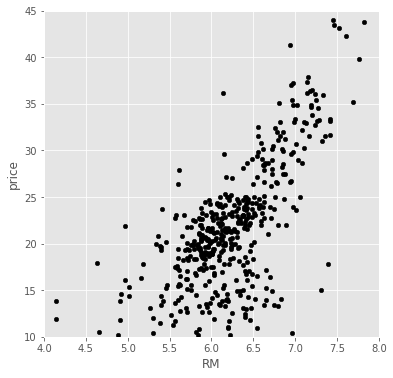

In [62]:
data_frame.plot(kind = 'scatter', x = 'RM', y = 'price', figsize = (6,6), color = 'black', xlim = (4,8), ylim = (10, 45))

In [63]:
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X = data_frame[['RM']], y = data_frame['price'])
prediction = linear_regression.predict(X = data_frame[['RM']])
print('a value =', linear_regression.intercept_)
print('b value =', linear_regression.coef_)

a value = -34.67062077643857
b value = [9.10210898]


In [64]:
residual = data_frame['price'] - prediction
residual.describe()

count    5.060000e+02
mean     1.899227e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: price, dtype: float64

분석에서 SSE/SST값이 더 의미가 있다고 봄 그래서 SST = SSR + SSE가 오차가 크면 SSE값을 따로 구해서 R^2를 구해야함

In [65]:
SSE = (residual**2).sum()
SST = ((data_frame['price'] - data_frame['price'].mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared =', R_squared)

R_squared = 0.4835254559913341


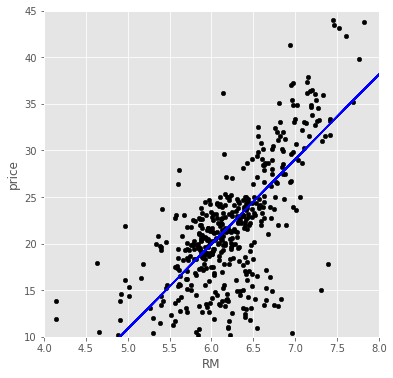

In [66]:
data_frame.plot(kind = 'scatter', x = 'RM', y = 'price', figsize=(6,6), color = 'black', xlim = (4, 8), ylim = (10, 45))
plt.plot(data_frame['RM'], prediction, color = 'blue')

In [68]:
print('score =',linear_regression.score(X=data_frame[['RM']], y = data_frame['price']))
print('Mean Squared Error =', mean_squared_error(prediction, data_frame['price']))
print('RMSE =', mean_squared_error(prediction, data_frame['price'])**0.5)

score = 0.4835254559913343
Mean Squared Error = 43.60055177116956
RMSE = 6.603071389222561
